# Analysis of the California Population Projection (Released 2016)

In this Python 3 notebook I set out to analyse the following:
- How has the overall population changed since 1970, and how is it projected to change between now and 2050.(1)
- How will these changes affect the major counties.(2)
- How will the lifespan of the population change within this time period.(3 & 4)

My analysis will be based of of the California Population Projection dataset, which can be found here:
https://data.ca.gov/dataset/california-population-projection-county-age-gender-and-ethnicity

Import the required libraries that we are going to use.

In [1]:
import csv
import sys 
import pylab 
import os.path
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

### Data Identification and Collection: 

In [2]:
# Ensure the file exists
if not os.path.exists( "CPP.csv" ):
    print("Missing dataset file")

Load and represent the CSV data using a Pandas DataFrame.

In [3]:
df = pd.read_csv( "CPP.csv" )

Sample of the data:

In [4]:
df.head(5)

,fips,county,year,age,pop_female,pop_male,pop_total
0,6001,ALAMEDA,1970,0,8533,8671,17204
1,6001,ALAMEDA,1970,1,8151,8252,16403
2,6001,ALAMEDA,1970,2,7753,8015,15768
3,6001,ALAMEDA,1970,3,8018,8412,16430
4,6001,ALAMEDA,1970,4,8551,8648,17199


### Data preparation: 

Find all distinct fips codes

In [5]:
df.fips.unique()

array([6001, 6003, 6005, 6007, 6009, 6011, 6013, 6015, 6017, 6019, 6021,
       6023, 6025, 6027, 6029, 6031, 6033, 6035, 6037, 6039, 6041, 6043,
       6045, 6047, 6049, 6051, 6053, 6055, 6057, 6059, 6061, 6063, 6065,
       6067, 6069, 6071, 6073, 6075, 6077, 6079, 6081, 6083, 6085, 6087,
       6089, 6091, 6093, 6095, 6097, 6099, 6101, 6103, 6105, 6107, 6109,
       6111, 6113, 6115], dtype=int64)

Each county has its own unique fips code.
There are 58 countys in the state of California.
There are 58 unique fips codes in the dataset.
This would imply that every county is accounted for within the dataset.

Find all unique county names within the dataset

In [6]:
df.county.unique()

array(['ALAMEDA', 'ALPINE', 'AMADOR', 'BUTTE', 'CALAVERAS', 'COLUSA',
       'CONTRA COSTA', 'DEL NORTE', 'EL DORADO', 'FRESNO', 'GLENN',
       'HUMBOLDT', 'IMPERIAL', 'INYO', 'KERN', 'KINGS', 'LAKE', 'LASSEN',
       'LOS ANGELES', 'MADERA', 'MARIN', 'MARIPOSA', 'MENDOCINO', 'MERCED',
       'MODOC', 'MONO', 'MONTEREY', 'NAPA', 'NEVADA', 'ORANGE', 'PLACER',
       'PLUMAS', 'RIVERSIDE', 'SACRAMENTO', 'SAN BENITO', 'SAN BERNARDINO',
       'SAN DIEGO', 'SAN FRANCISCO', 'SAN JOAQUIN', 'SAN LUIS OBISPO',
       'SAN MATEO', 'SANTA BARBARA', 'SANTA CLARA', 'SANTA CRUZ', 'SHASTA',
       'SIERRA', 'SISKIYOU', 'SOLANO', 'SONOMA', 'STANISLAUS', 'SUTTER',
       'TEHAMA', 'TRINITY', 'TULARE', 'TUOLUMNE', 'VENTURA', 'YOLO', 'YUBA'], dtype=object)

Again there is 58 strings in this array.
So far it seems that everything is in order.

How many years does this dataset take into account?

In [7]:
df["year"].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035,
       2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046,
       2047, 2048, 2049, 2050], dtype=int64)

Find the ages that are recorded in this dataset.

In [8]:
df["age"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

Notice that the list of ages stop at 100.
What happens in cases where people are older the 100?

Data Overview (count and types)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474125 entries, 0 to 474124
Data columns (total 7 columns):
fips          474125 non-null int64
county        474125 non-null object
year          474125 non-null int64
age           474125 non-null int64
pop_female    474125 non-null int64
pop_male      474125 non-null int64
pop_total     474125 non-null int64
dtypes: int64(6), object(1)
memory usage: 25.3+ MB


Each column seems to have the correct amount of values.
And 5/6 of the columns are of type int which is ideal.
The only exception is column 2 which stories the county's name.

Test to see if any cells are empty.

In [10]:
df.isnull().sum()

fips          0
county        0
year          0
age           0
pop_female    0
pop_male      0
pop_total     0
dtype: int64

The data I've obtained from the source seems to be very clean, in terms of correct data types, and no missing data.

I have a good idea of how the data is kept within the dataset, the only thing which I am unsure of is if people over the age of 100 are accounted for, but I can find that out later.

Although the dataset is clean, there isn't very much that can be done with the way the data is currently stored. 
It will have to be altered in order for me to be able to display what I need to in the form of graphs.

#### OverallPopulation Change

For this I want to display the overall projected population for each year in the form of a line graph 

Get 2 arrays, the first one should hold the years, while the second one should contain the population totals for those years

In [11]:
years = df["year"].unique()

In [12]:
tpop = 0
total_population = []
    
for year in years:
    tpop += df.loc[df['year'] == year, 'pop_total'].sum()
    total_population.append(tpop)
    tpop = 0
        

In [13]:
print(years,total_population)

[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029
 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044
 2045 2046 2047 2048 2049 2050] [20038286, 20346189, 20584978, 20869071, 21174085, 21537828, 21935440, 22351703, 22835638, 23256699, 23780068, 24277674, 24805011, 25336301, 25816294, 26402633, 27052291, 27716860, 28393094, 29142106, 29828238, 30458186, 30987427, 31313074, 31523075, 31711003, 31962164, 32451807, 32862213, 33418384, 34000880, 34512689, 34938327, 35388937, 35752738, 35985607, 36246843, 36552532, 36856189, 37077181, 37333583, 37674954, 38041489, 38373434, 38739410, 39059809, 39354432, 39693627, 40033093, 40375963, 40719999, 41061544, 41402168, 41740128, 42074892, 42407005, 42736293, 43062079, 4338529

Everything looks in order

### Analysis and interpretation:1 

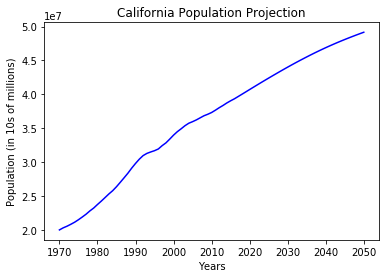

In [14]:
plt.plot(years,total_population,color='blue')
plt.xlabel('Years')
plt.ylabel('Population (in 10s of millions)')
plt.title('California Population Projection')
plt.show()

Analysis: The population is projected to increase steadily right up until 2050. Over twice as many people will be living in the state of California in 2050, when compared to 1970. 

#### Population Change by County

Next I want to see where all of these people will supposedly live. How the rise in population will affect each individual county. Ideally I would be able to place all 58 counties on the line graph. But this would make the graph too hard to interpret. So instead I just choose the top 5 counties (Los Angeles,Orange, Riverside, San Diego and San Francisco).

In [15]:
#fips codes of the 5 countys
fips_codes = [6037,6059,6065,6073,6075]

For this, I'll need 3 arrays, one to hold the fips, one to hold the years and finally the last one must contain the total population of that county for the specific year.

In [16]:
fpop = 0
total_population2 = []
fips = []
yrs = []

for fip in fips_codes:
    for year in years:
        fpop += df.loc[(df['fips'] == fip) & (df['year'] == year), 'pop_total'].sum()
        fips.append(fip)
        yrs.append(year)
        total_population2.append(fpop)
        fpop = 0


In [17]:
print(fips,yrs,total_population2)

[6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6065, 6065, 6065, 6065, 606

Looks good, but it needs to be broken down into smaller parts (seperate the data for each county).

In [18]:
fip_array = [fips[x:x+81] for x in range(0, len(fips), 81)]
year_array = [yrs[x:x+81] for x in range(0, len(yrs), 81)]
pop_array = [total_population2[x:x+81] for x in range(0, len(total_population2), 81)]

This  breaks up the array in to smaller more managable arrays which can be graphed. 

In [19]:
print(fip_array)
print(year_array)
print(pop_array)

[[6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037, 6037], [6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059, 6059], [6065, 6065, 6065, 6065

Now I need to save each sub-array above as new individual arrays according to which county they refer to.

In [20]:
LOSANGELES = np.array(pop_array[0])
ORANGE = np.array(pop_array[1])
RIVERSIDE = np.array(pop_array[2])
SANDIEGO = np.array(pop_array[3])
SANFRANCISCO = np.array(pop_array[4])

I used the county names to name the arrays, in order to help identify which is which.

I only need to store the overall populations for each county in these arrays, as they will all share the same years in common. I can use the years array that I used for the first graph.

In [21]:
print(LOSANGELES)

[ 7055793  7092010  7072098  7084804  7124499  7191294  7243389  7258199
  7338595  7389594  7500308  7607117  7766309  7921906  8044402  8190891
  8373119  8527394  8639399  8768685  8860302  8955322  9060253  9083688
  9106495  9101127  9108069  9185566  9265805  9394314  9543982  9635792
  9722446  9791019  9822509  9809558  9787329  9773899  9796809  9805233
  9837011  9900858  9988287 10055477 10124684 10185487 10229245 10288515
 10344538 10398558 10451759 10502215 10551604 10598699 10644569 10688523
 10730832 10771243 10810932 10848947 10885337 10920165 10953322 10984977
 11014656 11042709 11070046 11095826 11119279 11141094 11161569 11179574
 11197218 11212616 11225825 11238210 11247693 11257101 11264455 11269849
 11274596]


### Analysis and Interpretation:2

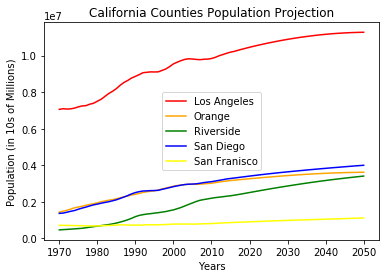

In [22]:
plt.plot(years,LOSANGELES,color='red')
plt.plot(years,ORANGE,color='orange')
plt.plot(years,RIVERSIDE,color='green')
plt.plot(years,SANDIEGO,color='blue')
plt.plot(years,SANFRANCISCO,color='yellow')
plt.gca().legend(('Los Angeles','Orange','Riverside','San Diego','San Franisco'))
plt.xlabel('Years')
plt.ylabel('Population (in 10s of Millions)')
plt.title('California Counties Population Projection')
plt.show()

Analysis: Los Angeles will remain California's most populated county in the future. Althogh Riverside will see the biggest change in population between the year 1970 and 2050.

I was suprised to how little San Fransico's population is projected to change, considering it is home to the worlds biggest tech industry Silicone Valley.

#### Population Lifespan

Next up, I wanted to see how the lifespan of the population will change.

In order to display the information more effectively, I have decided to group the ages into age groups.

In [23]:
age_group = ["0-04","05-09","10-14","15-19","20-24","25-29","30-34","35-39","40-44","45-49",
             "50-54","55-59","60-64","65-69","70-74","75-79","80-84","85-89","90-94","95-99",">99"]

I will only foucus on 3 years 1970, 2018 and 2050

In [24]:
df1 = df[df['year'] == 1970].copy()

In [25]:
df2 = df[df['year'] == 2018].copy()

In [26]:
df3 = df[df['year'] == 2050].copy()

In [27]:
df1.head(5)

,fips,county,year,age,pop_female,pop_male,pop_total
0,6001,ALAMEDA,1970,0,8533,8671,17204
1,6001,ALAMEDA,1970,1,8151,8252,16403
2,6001,ALAMEDA,1970,2,7753,8015,15768
3,6001,ALAMEDA,1970,3,8018,8412,16430
4,6001,ALAMEDA,1970,4,8551,8648,17199


In [28]:
df1["age"].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

Next I need to sort the data into their correct age groups. I thought it would be best to sort the 3 different years att once as it would ensure that data was handled in the exact same way, in order to prevent errors.

In [29]:
female_pop_1970 = []
male_pop_1970 = []
total_pop_1970 = []
female_pop_2018 = []
male_pop_2018 = []
total_pop_2018 = []
female_pop_2050 = []
male_pop_2050 = []
total_pop_2050 = []

age = 0
fpop1 = 0
mpop1 = 0
tpop1 = 0
fpop2 = 0
mpop2 = 0
tpop2 = 0
fpop3 = 0
mpop3 = 0
tpop3 = 0


while(age < 5):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1

female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 5:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0

while(age < 10):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 10:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0
    

while(age < 15):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 15:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0

    
while(age < 20):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 20:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0

while(age < 25):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 25:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0

    
while(age < 30):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 30:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0
    
while(age < 35):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 35:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0

while(age < 40):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 40:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0
    
while(age < 45):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 45:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0
    
while(age < 50):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 50:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0
    
while(age < 55):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 55:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0
    
while(age < 60):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 60:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0
    
while(age < 65):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 65:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0
    
while(age < 70):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 70:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0
    
while(age < 75):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 75:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0

while(age < 80):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 80:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0
    
while(age < 85):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 85:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0
    
while(age < 90):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 90:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0
        

while(age < 95):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 95:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0
    
while(age < 100):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)
if age == 100:
    fpop1 = 0
    mpop1 = 0
    tpop1 = 0
    fpop2 = 0
    mpop2 = 0
    tpop2 = 0
    fpop3 = 0
    mpop3 = 0
    tpop3 = 0
    
while( age == 100):
        fpop1 += df1.loc[df1['age'] == age, 'pop_female'].sum()
        mpop1 += df1.loc[df1['age'] == age, 'pop_male'].sum()
        tpop1 += df1.loc[df1['age'] == age, 'pop_total'].sum()
        fpop2 += df2.loc[df2['age'] == age, 'pop_female'].sum()
        mpop2 += df2.loc[df2['age'] == age, 'pop_male'].sum()
        tpop2 += df2.loc[df2['age'] == age, 'pop_total'].sum()
        fpop3 += df3.loc[df3['age'] == age, 'pop_female'].sum()
        mpop3 += df3.loc[df3['age'] == age, 'pop_male'].sum()
        tpop3 += df3.loc[df3['age'] == age, 'pop_total'].sum()
        age += 1
    
female_pop_1970.append(fpop1)
male_pop_1970.append(mpop1)
total_pop_1970.append(tpop1)
female_pop_2018.append(fpop2)
male_pop_2018.append(mpop2)
total_pop_2018.append(tpop2)
female_pop_2050.append(fpop3)
male_pop_2050.append(mpop3)
total_pop_2050.append(tpop3)




Store these arrays into dataframes.

In [30]:
df1a = pd.DataFrame({"age_group" : age_group, "female_pop_1970" : female_pop_1970, "male_pop_1970" : male_pop_1970, "total_pop_1970" : total_pop_1970})
df2a = pd.DataFrame({"age_group" : age_group, "female_pop_2018" : female_pop_2018, "male_pop_2018" : male_pop_2018, "total_pop_2018" : total_pop_2018})
df3a = pd.DataFrame({"age_group" : age_group, "female_pop_2050" : female_pop_2050, "male_pop_2050" : male_pop_2050, "total_pop_2050" : total_pop_2050})

Check to make sure they are stored correctly.

In [31]:
df1a.head(5)

,age_group,female_pop_1970,male_pop_1970,total_pop_1970
0,0-04,801420,821086,1622506
1,05-09,937430,956756,1894186
2,10-14,959683,977762,1937445
3,15-19,892815,962860,1855675
4,20-24,879075,1016572,1895647


In [32]:
df1a.tail(5)

,age_group,female_pop_1970,male_pop_1970,total_pop_1970
16,80-84,130718,76551,207269
17,85-89,58282,28520,86802
18,90-94,18883,8371,27254
19,95-99,4424,1665,6089
20,>99,4837,4675,9512


According to the dataset there is more people aged 100 years old, than there is people aged between 95-99. This can only mean that people aged over 100 are stored within the dataset as been 100 years old. This is why I represented them at >99.  

In [33]:
df2a.head(5)

,age_group,female_pop_2018,male_pop_2018,total_pop_2018
0,0-04,1189273,1275448,2464721
1,05-09,1253879,1312672,2566551
2,10-14,1283053,1345053,2628106
3,15-19,1361085,1428823,2789908
4,20-24,1456558,1574735,3031293


In [34]:
df3a.head(5)

,age_group,female_pop_2050,male_pop_2050,total_pop_2050
0,0-04,1142610,1262925,2405535
1,05-09,1189204,1311548,2500752
2,10-14,1215588,1340156,2555744
3,15-19,1343692,1478753,2822445
4,20-24,1460046,1642850,3102896


Double check the names of the columns to ensure I call them correctly for the graphs

In [35]:
df1a.columns

Index(['age_group', 'female_pop_1970', 'male_pop_1970', 'total_pop_1970'], dtype='object')

In [36]:
df2a.columns

Index(['age_group', 'female_pop_2018', 'male_pop_2018', 'total_pop_2018'], dtype='object')

In [37]:
df3a.columns

Index(['age_group', 'female_pop_2050', 'male_pop_2050', 'total_pop_2050'], dtype='object')

### Analysis and interpretation:3

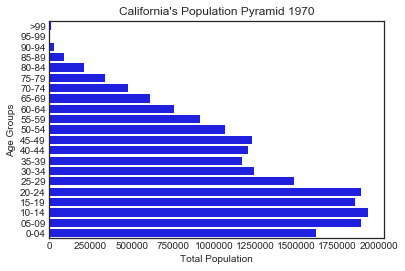

In [38]:
sns.set_style("white")

bar_plot = sns.barplot(x="total_pop_1970",y="age_group", color="blue",data = df1a, order =['>99','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','05-09','0-04'])

bar_plot.set(xlabel="Total Population", ylabel="Age Groups", title = "California's Population Pyramid 1970");

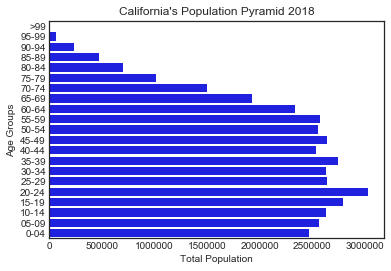

In [39]:
sns.set_style("white")

bar_plot = sns.barplot(x="total_pop_2018",y="age_group", color="blue",data = df2a, order =['>99','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','05-09','0-04'])

bar_plot.set(xlabel="Total Population", ylabel="Age Groups", title = "California's Population Pyramid 2018");

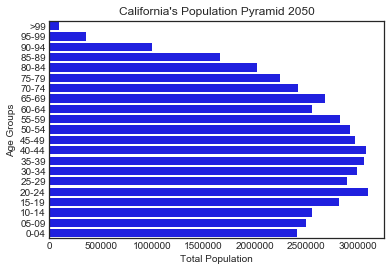

In [40]:
sns.set_style("white")

bar_plot = sns.barplot(x="total_pop_2050",y="age_group", color="blue",data = df3a, order =['>99','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','05-09','0-04'])
 
bar_plot.set(xlabel="Total Population", ylabel="Age Groups", title = "California's Population Pyramid 2050");

Analysis: We can see from the 3 graphs above, more people are projected to live longer into the future (The graphs gradually become more weighted at the top as the years progress). This could be down to better medication, such as cures for HIV and Canncer. 

It is also clear to see from the graph that 2018 had an unusually low percentage of its population aged >99, lets compare these age group rows from the dataframes to get a better understanding.

In [41]:
df1a.tail(1)

,age_group,female_pop_1970,male_pop_1970,total_pop_1970
20,>99,4837,4675,9512


In [42]:
df2a.tail(1)

,age_group,female_pop_2018,male_pop_2018,total_pop_2018
20,>99,4779,1632,6411


In [43]:
df3a.tail(1)

,age_group,female_pop_2050,male_pop_2050,total_pop_2050
20,>99,70241,19180,89421


It's extremely suprising to see that there is less people aged >99 in 2018 than 1970, especially when you consider that there is almost twice as many people living in California in 2018 than there was in 1970 (illustrated in the first visualisation). With the growth in population you would expect a growth in the people aged >99.

This could be down to an increased intake of processed foods in people's diets, in recent years.

Thankfully the amount of people age greater than 99 is schedueled to rise significantly between now and 2050.

I want to go a step further and see how this applies to Males and Females separately

### Analysis and interpretation:4

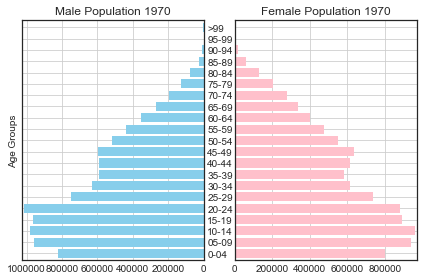

In [44]:
fig, axes = plt.subplots(ncols=2, sharey=True)

axes[0].barh(age_group, male_pop_1970, align='center', color='skyblue', zorder=1)
axes[0].set(title='Male Population 1970')
axes[1].barh(age_group, female_pop_1970, align='center', color='pink', zorder=1)
axes[1].set(title='Female Population 1970')

axes[0].invert_xaxis()
axes[0].set(yticks=age_group, yticklabels=age_group)
axes[0].yaxis.tick_right()
axes[0].set_ylabel('Age Groups')

for ax in axes.flat:
    ax.margins(0.01)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.17)
plt.show()

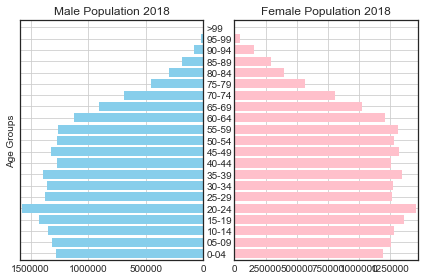

In [45]:
fig, axes = plt.subplots(ncols=2, sharey=True)

axes[0].barh(age_group, male_pop_2018, align='center', color='skyblue', zorder=1)
axes[0].set(title='Male Population 2018')
axes[1].barh(age_group, female_pop_2018, align='center', color='pink', zorder=1)
axes[1].set(title='Female Population 2018')

axes[0].invert_xaxis()
axes[0].set(yticks=age_group, yticklabels=age_group)
axes[0].yaxis.tick_right()
axes[0].set_ylabel('Age Groups')

for ax in axes.flat:
    ax.margins(0.01)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.17)
plt.show()

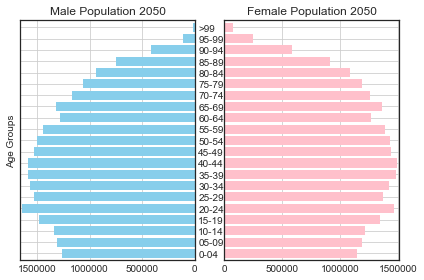

In [46]:
fig, axes = plt.subplots(ncols=2, sharey=True)

axes[0].barh(age_group, male_pop_2050, align='center', color='skyblue', zorder=1)
axes[0].set(title='Male Population 2050')
axes[1].barh(age_group, female_pop_2050, align='center', color='pink', zorder=1)
axes[1].set(title='Female Population 2050')

axes[0].invert_xaxis()
axes[0].set(yticks=age_group, yticklabels=age_group)
axes[0].yaxis.tick_right()
axes[0].set_ylabel('Age Groups')

for ax in axes.flat:
    ax.margins(0.01)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.17)
plt.show()

Analysis: The 3 population pyramids abouve all show a roughly equal divde in the number of Males and Females. It also appears that Females seem to be living slightly longer than Males, according to all 3 of these years. It's possible that it is just a coincidence that Females are projected to live longer than men in the 3 years in question, but I believe if we looked at all of the years we would see this trend throughout. 

### Possible Further Analysis  

This dataset is just a projection, I would be intrigued to see accurate this projection really is. To test this, I could obtain more accurate data in 10 years time and compare how this projection fared against the actual population for those 10 years, This would give a good indication of just how reliable this projection is. I could do this test every 5-10 years. 

Another interesting option would be to explore how California compares with other states in the US. I'd reckon that California would fare quiet well as it is one of America's bigest states. But it would be intersting to study other states, for example Florida is known for having an older population, due to many retired people settling there.

Other options would include looking at why Female supposedly live longer than men, but this would require looking at different datasets, such as medical ones.